In [2]:
import pandas as pd
import numpy as np

In [3]:
transactions=pd.read_csv('data/twm_transactions.csv',sep=';')

In [4]:
checking_tran=pd.read_csv('data/twm_checking_tran.csv',sep=';')

In [5]:
credit_tran=pd.read_csv('data/twm_credit_tran.csv',sep=';')

In [6]:
savings_tran=pd.read_csv('data/twm_savings_tran.csv',sep=';')

_______________

## Cleaning and transforming transactions Table

In [28]:
transactions.head(5)

,tran_id,acct_nbr,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
0,27,13625623,0.00,0.00,0.0,3753.34,21.10.1995,121656,A,IQ
1,97,13628392,0.00,0.00,0.0,254.49,5.2.1995,153053,V,IQ
2,21,13630842,-97.57,-97.57,0.0,3819.56,23.7.1995,0,P,WD
3,44,13631412,-0.15,-0.15,0.0,224.05,30.1.1995,0,,FK
4,31,13625722,0.00,0.00,0.0,240.55,25.1.1995,204521,B,IQ


In [29]:
transactions.describe()

,tran_id,acct_nbr,tran_amt,principal_amt,interest_amt,new_balance,tran_time
count,77580.000000,7.758000e+04,77580.000000,77580.000000,77580.000000,77580.000000,77580.000000
mean,38.228332,1.185674e+15,-7.748275,-8.509662,0.762784,571.571177,104277.077984
std,27.838521,2.000564e+15,312.684674,311.006502,4.427059,2158.948572,87527.030938
min,1.000000,1.362480e+07,-3312.410000,-3312.410000,0.000000,-17300.000000,0.000000
25%,15.000000,1.362824e+07,-100.000000,-100.000000,0.000000,0.000000,0.000000
50%,32.000000,1.363199e+07,-1.815000,-1.815000,0.000000,180.400000,110626.000000
75%,59.000000,4.561143e+15,0.170000,0.000000,0.000000,957.252500,184245.250000
max,155.000000,4.561143e+15,17464.520000,17300.000000,164.520000,29868.390000,235959.000000


In [30]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77580 entries, 0 to 77579
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tran_id        77580 non-null  int64  
 1   acct_nbr       77580 non-null  int64  
 2   tran_amt       77580 non-null  float64
 3   principal_amt  77580 non-null  float64
 4   interest_amt   77580 non-null  float64
 5   new_balance    77580 non-null  float64
 6   tran_date      77580 non-null  object 
 7   tran_time      77580 non-null  int64  
 8   channel        77580 non-null  object 
 9   tran_code      77580 non-null  object 
dtypes: float64(4), int64(3), object(3)
memory usage: 5.9+ MB


## Identifying outliers in Transactions table

In [31]:
from scipy import stats

#Finding Z Score on Column
stats.zscore(transactions['tran_amt'])

#view the outliers
transactions['tran_amt'][(np.abs(stats.zscore(transactions['tran_amt'])) > 3)]

124      1070.85
158      1000.00
194     -1497.42
261      1438.27
266      1300.00
          ...   
77200    2125.59
77255     944.39
77421     980.19
77430   -1106.28
77531   -2815.52
Name: tran_amt, Length: 1351, dtype: float64

## Deleting outliers

In [32]:
transactions_clean=transactions[(np.abs(stats.zscore(transactions['tran_amt'])) <= 3)]
transactions_clean

,tran_id,acct_nbr,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
0,27,13625623,0.00,0.00,0.0,3753.34,21.10.1995,121656,A,IQ
1,97,13628392,0.00,0.00,0.0,254.49,5.2.1995,153053,V,IQ
2,21,13630842,-97.57,-97.57,0.0,3819.56,23.7.1995,0,P,WD
3,44,13631412,-0.15,-0.15,0.0,224.05,30.1.1995,0,,FK
4,31,13625722,0.00,0.00,0.0,240.55,25.1.1995,204521,B,IQ
...,...,...,...,...,...,...,...,...,...,...
77575,77,13631752,-95.71,-95.71,0.0,95.71,14.2.1995,161001,A,TR
77576,94,13626772,-93.90,-93.90,0.0,824.36,11.3.1995,0,P,WD
77577,42,13625262,-10.35,-10.35,0.0,10.36,26.8.1995,0,P,WD
77578,98,13627052,-423.80,-423.80,0.0,162.28,13.6.1995,110209,E,WD


----------------------------------

## Deleting unwanted columns

In [35]:
transactions_clean=transactions_clean[['acct_nbr','tran_amt']]
transactions_clean.describe()

,acct_nbr,tran_amt
count,7.622900e+04,76229.000000
mean,1.163487e+15,114.427984
std,1.988261e+15,160.212350
min,1.362480e+07,0.000000
25%,1.362822e+07,0.390000
50%,1.363195e+07,53.430000
75%,4.561143e+15,166.630000
max,4.561143e+15,944.570000


In [37]:
transactions_clean['tran_amt'].abs()
transactions_clean['tran_amt']=transactions_clean['tran_amt'].abs()

In [38]:
transactions_clean_df1 = transactions_clean.groupby(['acct_nbr']).count()

transactions_clean_df1 = transactions_clean_df1.rename(columns={'tran_id': 'transaction_count'})
transactions_clean_df1

,tran_amt
acct_nbr,
13624802,96
13624803,26
13624842,99
13624843,33
13624852,99
...,...
4561143213634830,74
4561143213634840,39
4561143213634850,22


In [39]:
transactions_clean_df2 = transactions_clean.groupby(['acct_nbr']).mean()
transactions_clean_df2 = transactions_clean_df2.rename(columns={'tran_amt': 'avg_tran_amt'})


transactions_clean_df2

,avg_tran_amt
acct_nbr,
13624802,99.535208
13624803,128.769231
13624842,77.955758
13624843,120.860606
13624852,103.074444
...,...
4561143213634830,140.094459
4561143213634840,176.143590
4561143213634850,67.272727


In [42]:
result_tran_clean = pd.concat([transactions_clean_df1, transactions_clean_df2], axis=1, join="inner")
transactions_result=result_tran_clean
transactions_result.head()

,tran_amt,avg_tran_amt
acct_nbr,,
13624802,96,99.535208
13624803,26,128.769231
13624842,99,77.955758
13624843,33,120.860606
13624852,99,103.074444


In [43]:
# exporting the cleaned data as a CSV file 
transactions_result.to_csv('data/transactions_result.csv',index=False)

-----------------------------

## Cleaning checking_tran Table

In [7]:
checking_tran.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46204 entries, 0 to 46203
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   cust_id        46204 non-null  int64  
 1   tran_id        46204 non-null  int64  
 2   tran_amt       46204 non-null  float64
 3   principal_amt  46204 non-null  float64
 4   interest_amt   46204 non-null  float64
 5   new_balance    46204 non-null  float64
 6   tran_date      46204 non-null  object 
 7   tran_time      46204 non-null  object 
 8   channel        46204 non-null  object 
 9   tran_code      46204 non-null  object 
dtypes: float64(4), int64(2), object(4)
memory usage: 3.5+ MB


In [8]:
checking_tran.describe()

,cust_id,tran_id,tran_amt,principal_amt,interest_amt,new_balance
count,4.620400e+04,46204.000000,46204.000000,46204.000000,46204.000000,46204.000000
mean,1.362998e+06,47.823175,-17.039341,-17.155132,0.115790,1152.162744
std,2.957497e+02,28.457501,246.405359,246.395847,0.845523,2009.266714
min,1.362480e+06,1.000000,-3312.410000,-3312.410000,0.000000,0.000000
25%,1.362740e+06,23.000000,-80.000000,-80.000000,0.000000,78.440000
50%,1.362997e+06,47.000000,-0.750000,-0.750000,0.000000,407.490000
75%,1.363262e+06,72.000000,0.000000,0.000000,0.000000,1522.675000
max,1.363495e+06,99.000000,5355.050000,5355.050000,27.300000,29868.390000


In [9]:
from scipy import stats

#Finding Z Score on Column
stats.zscore(checking_tran['tran_amt'])

#view the outliers
checking_tran['tran_amt'][(np.abs(stats.zscore(checking_tran['tran_amt'])) > 3)]

27       -817.25
59       1327.76
94      -1404.17
260      3314.96
300      1390.51
          ...   
46080    -773.40
46104    1143.11
46146     740.97
46190   -1218.90
46203    1261.26
Name: tran_amt, Length: 1021, dtype: float64

## Deleting outliers

In [10]:
checking_tran_clean=checking_tran[(np.abs(stats.zscore(checking_tran['tran_amt'])) <= 3)]
checking_tran_clean.head()

,cust_id,tran_id,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
0,1363481,26,-0.15,-0.15,0.0,58.99,29.1.1995,,,FK
1,1362784,90,-200.00,-200.00,0.0,1380.69,2.7.1995,53313,A,WD
2,1363088,46,0.00,0.00,0.0,128.35,26.3.1995,834,A,IQ
3,1363306,32,-40.32,-40.32,0.0,433.06,29.1.1995,,P,WD
4,1363251,11,-87.88,-87.88,0.0,1919.55,8.2.1995,,P,WD


In [14]:
checking_tran_clean=checking_tran_clean[['cust_id','tran_amt']]

In [15]:
checking_tran_clean['tran_amt']=checking_tran_clean['tran_amt'].abs()

In [66]:
checking_tran_clean_df1 = checking_tran_clean.groupby(['cust_id']).count()
checking_tran_clean_df1= checking_tran_clean_df1.rename(columns={'tran_amt': 'checking_tran_count'})
checking_tran_clean_df1.head(2)

,checking_tran_count
cust_id,
1362480,93
1362484,98


In [67]:
checking_tran_clean_df2 = checking_tran_clean.groupby(['cust_id']).mean()
checking_tran_clean_df2 = checking_tran_clean_df2.rename(columns={'tran_amt': 'checking_tran_avg'})
checking_tran_clean_df2.head(2)

,checking_tran_avg
cust_id,
1362480,76.888710
1362484,71.330918


In [68]:
result_checking_tran_clean = pd.concat([checking_tran_clean_df1, checking_tran_clean_df2], axis=1, join="inner")
checking_result=result_checking_tran_clean
checking_result.head()

,checking_tran_count,checking_tran_avg
cust_id,,
1362480,93,76.888710
1362484,98,71.330918
1362485,96,80.350625
1362486,25,43.256000
1362487,52,62.400577


In [69]:
# exporting the cleaned data as a CSV file 
checking_result.to_csv('data/checking_result.csv',index=False)

## Cleaning credit_tran Table

In [45]:
credit_tran.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20167 entries, 0 to 20166
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   cust_id        20167 non-null  int64  
 1   tran_id        20167 non-null  int64  
 2   tran_amt       20167 non-null  float64
 3   principal_amt  20167 non-null  float64
 4   interest_amt   20167 non-null  float64
 5   new_balance    20167 non-null  float64
 6   tran_date      20167 non-null  object 
 7   tran_time      20167 non-null  object 
 8   channel        20167 non-null  object 
 9   tran_code      20167 non-null  object 
dtypes: float64(4), int64(2), object(4)
memory usage: 1.5+ MB


In [70]:
credit_tran.describe()

,cust_id,tran_id,tran_amt,principal_amt,interest_amt,new_balance
count,2.016700e+04,20167.000000,20167.000000,20167.000000,20167.000000,20167.000000
mean,1.362987e+06,28.543065,0.773537,-1.429786,2.208701,-1130.349441
std,2.934641e+02,21.946014,455.914969,451.535918,8.135091,1377.689559
min,1.362480e+06,1.000000,-1565.500000,-1565.500000,0.000000,-17300.000000
25%,1.362730e+06,12.000000,-166.790000,-166.790000,0.000000,-1411.110000
50%,1.362980e+06,24.000000,-67.510000,-67.510000,0.000000,-766.210000
75%,1.363249e+06,40.000000,0.000000,0.000000,0.000000,-334.290000
max,1.363492e+06,155.000000,17464.520000,17300.000000,164.520000,0.000000


In [47]:
from scipy import stats

#Finding Z Score on Column
stats.zscore(credit_tran['tran_amt'])

#view the outliers
credit_tran['tran_amt'][(np.abs(stats.zscore(credit_tran['tran_amt'])) > 3)]

100      2000.40
121      1428.75
212     -1565.50
240      5384.21
288      1708.41
          ...   
19846    1534.27
20128    1653.86
20137    2071.77
20145    1784.96
20149    2573.78
Name: tran_amt, Length: 313, dtype: float64

## Deleting outliers

In [48]:
credit_tran_clean=credit_tran[(np.abs(stats.zscore(credit_tran['tran_amt'])) <= 3)]

credit_tran_clean.head()

,cust_id,tran_id,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
0,1363088,46,-121.49,-121.49,0.0,-141.00,20.10.1995,101144,E,CG
1,1363306,32,-220.64,-220.64,0.0,-520.13,13.10.1995,83115,E,CG
2,1362959,10,0.00,0.00,0.0,-3900.00,26.2.1995,84129,K,IQ
3,1363429,13,-195.27,-195.27,0.0,-1739.74,3.1.1995,191815,E,CG
4,1363393,14,-37.32,-37.32,0.0,-198.98,4.7.1995,100811,E,CG


In [49]:
credit_tran_clean=credit_tran_clean[['cust_id','tran_amt']]
credit_tran_clean.describe()

,cust_id,tran_amt
count,1.985400e+04,19854.000000
mean,1.362988e+06,-36.236328
std,2.936307e+02,285.937809
min,1.362480e+06,-1355.900000
25%,1.362730e+06,-168.772500
50%,1.362985e+06,-70.130000
75%,1.363249e+06,0.000000
max,1.363492e+06,1363.980000


In [50]:
credit_tran_clean['tran_amt']=credit_tran_clean['tran_amt'].abs()

In [54]:
credit_tran_clean_df1 = credit_tran_clean.groupby(['cust_id']).count()
credit_tran_clean_df1= credit_tran_clean_df1.rename(columns={'tran_amt': 'credit_tran_count'})
credit_tran_clean_df1.head(2)

,credit_tran_count
cust_id,
1362480,31
1362484,55


In [55]:
credit_tran_clean_df2 = credit_tran_clean.groupby(['cust_id']).mean()
credit_tran_clean_df2= credit_tran_clean_df2.rename(columns={'tran_amt': 'credit_tran_avg'})
credit_tran_clean_df2.head(2)

,credit_tran_avg
cust_id,
1362480,191.106129
1362484,182.569636


In [64]:
result_checking_tran_clean=pd.concat([credit_tran_clean_df1,credit_tran_clean_df2],axis=1, join="inner")
credit_result=result_checking_tran_clean

In [65]:
# exporting the cleaned data as a CSV file 
credit_result.to_csv('data/credit_result.csv',index=False)

## Cleaning savings_tran Table

In [ ]:
savings_tran.info()

In [ ]:
savings_tran.describe()

In [ ]:
from scipy import stats

#Finding Z Score on Column
stats.zscore(savings_tran['tran_amt'])

#view the outliers
savings_tran['tran_amt'][(np.abs(stats.zscore(savings_tran['tran_amt'])) > 3)]

## Deleting outliers

In [81]:
savings_tran_clean=savings_tran[(np.abs(stats.zscore(savings_tran['tran_amt'])) <= 3)]

savings_tran_clean.head()

,cust_id,tran_id,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
0,1363481,26,136.03,136.03,0.00,1521.57,26.10.1995,84111,A,DP
1,1362746,1,2.83,0.00,2.83,2265.90,31.1.1995,235959,,IN
2,1363251,11,13.56,0.00,13.56,5438.90,30.4.1995,235959,,IN
3,1362542,4,0.76,0.00,0.76,610.92,30.4.1995,235959,,IN
4,1363387,11,148.69,148.69,0.00,470.05,21.5.1995,144736,E,DP


In [82]:
savings_tran_clean=savings_tran_clean[['cust_id','tran_amt']]
#result_savings_tran_clean.describe()

Text(0, 0.5, 'Frequency')

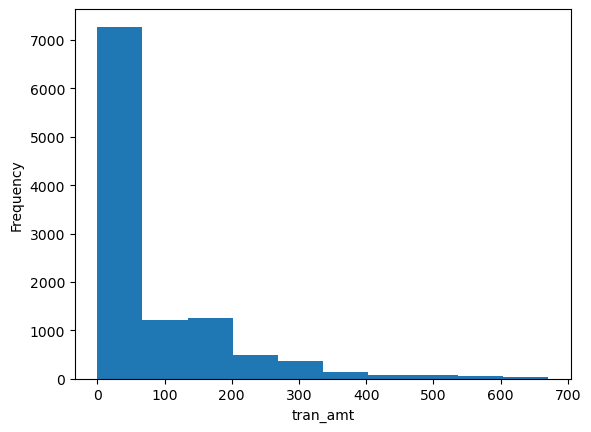

In [84]:
# Create a histogram of the tran_amt column
plt.hist(result_savings_tran_clean['tran_amt'])
plt.xlabel('tran_amt')
plt.ylabel('Frequency')
plt.show()

In [85]:
savings_tran_clean['tran_amt']=savings_tran_clean['tran_amt'].abs()

In [86]:
savings_tran_clean_df1 = savings_tran_clean.groupby(['cust_id']).count()
savings_tran_clean_df1= savings_tran_clean_df1.rename(columns={'tran_amt': 'savings_tran_count'})
savings_tran_clean_df1.head(2)

,savings_tran_count
cust_id,
1362480,26
1362484,31


In [87]:
savings_tran_clean_df2 = savings_tran_clean.groupby(['cust_id']).mean()
savings_tran_clean_df2= savings_tran_clean_df2.rename(columns={'tran_amt': 'savings_tran_avg'})
savings_tran_clean_df2.head(2)

,savings_tran_avg
cust_id,
1362480,128.769231
1362484,81.172581


In [88]:
result_checking_tran_clean=pd.concat([savings_tran_clean_df1,savings_tran_clean_df2],axis=1, join="inner")
savings_result=result_checking_tran_clean

In [89]:
# exporting the cleaned data as a CSV file 
savings_result.to_csv('data/savings_result.csv',index=False)